In [1]:
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk 
import matplotlib.pyplot as plt
from skimage import color, io, measure
from skimage.filters import threshold_otsu
import numpy as np

In [2]:
def plot_comparison(original, filtered, filter_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    io.show()

We will start by computing a binary image from the lego image:

Read the image into im_org.
Convert the image to gray scale.
Find a threshold using Otsu's method.
Apply the treshold and generate a binary image bin_img.
Visualize the image using plot_comparison(im_org, bin_img, 'Binary image')
As ncan be seen, the lego brick is not segmented perfectly. There are holes in the segmentation. Let us see if what we can do.

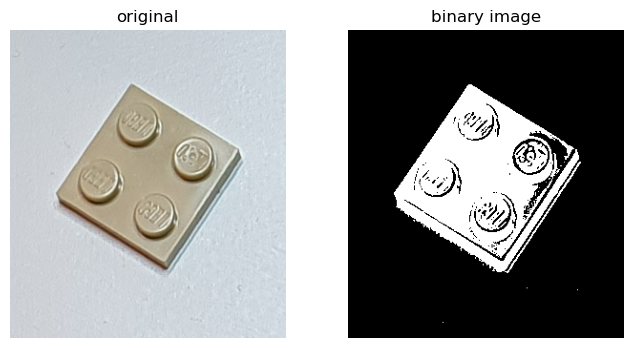

In [3]:
lego_5 = io.imread("lego_5.png")
lego_5_gray = color.rgb2gray(lego_5)
threshHold = threshold_otsu(lego_5_gray)
bin_img = lego_5_gray < threshHold

plot_comparison(lego_5,bin_img, "binary image")

We will start by creating a structuring element. In scikit-image they are called footprint. A disk shaped footprint can be created by:

In [4]:
footprint = disk(3)
# Check the size and shape of the structuring element

print(footprint)

[[0 0 0 1 0 0 0]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [1 1 1 1 1 1 1]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [0 0 0 1 0 0 0]]


The morphological operation erosion can remove small objects, separate objects and make objects smaller. Try it on the binary lego image:

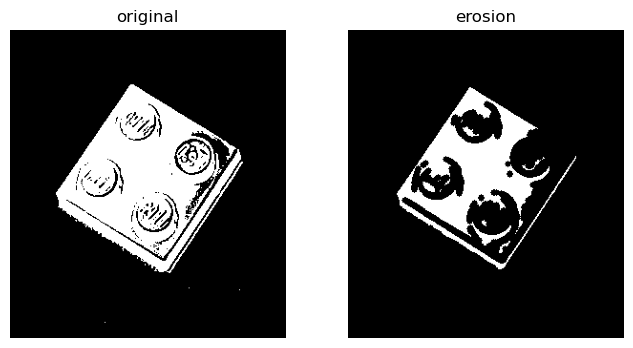

In [5]:
eroded = erosion(bin_img, footprint)
plot_comparison(bin_img, eroded, 'erosion')

The morphological operation dilation makes objects larger, closes holes and connects objects. Try it on the binary lego image:

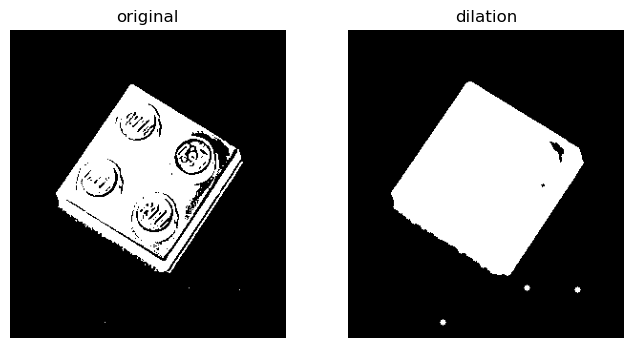

In [6]:
dilated = dilation(bin_img, footprint)
plot_comparison(bin_img, dilated, 'dilation')

The morphological operation opening removes small objects without changing the size of the remaining objects. Try it on the binary lego image:

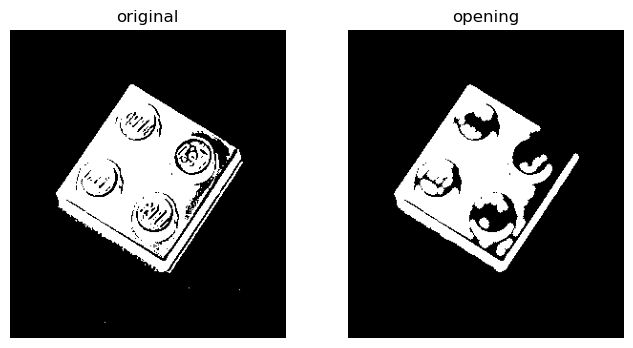

In [7]:
opened = opening(bin_img, footprint)
plot_comparison(bin_img, opened, 'opening')

The morphological operation closing closes holes in objects without changing the size of the remaining objects. Try it on the binary lego image:

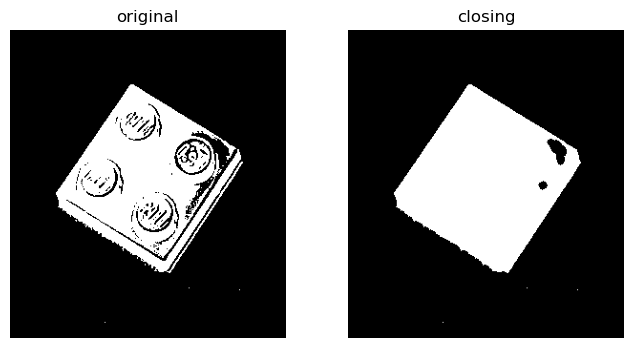

In [8]:
closed = closing(bin_img, footprint)
plot_comparison(bin_img, closed, 'closing')

It can be useful to compute the outline of an object both to measure the perimeter but also to see if it contains holes or other types of noise. Start by defining an outline function:

In [9]:
def compute_outline(bin_img):
    """
    Computes the outline of a binary image
    """
    footprint = disk(1)
    dilated = dilation(bin_img, footprint)
    outline = np.logical_xor(dilated, bin_img)
    return outline

Compute the outline of the binary image of the lego brick. What do you observe?

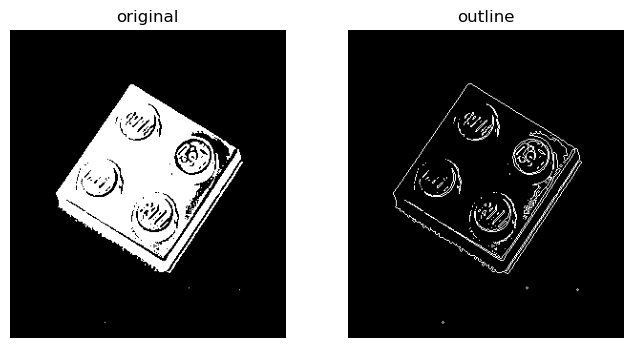

In [10]:
plot_comparison(bin_img,compute_outline(bin_img),"outline")

Do an opening with a disk of size 1 on the binary lego image.
Do a closing with a disk of size 15 on the result of the opening.
Compute the outline and visualize it.

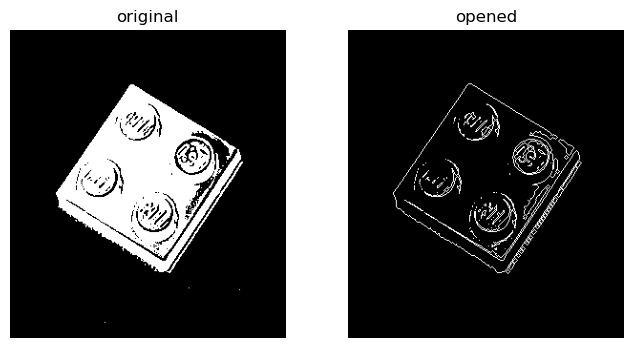

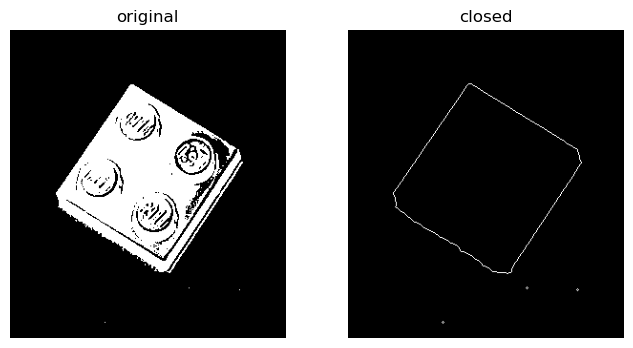

In [11]:
footprint = disk(1)
opened = opening(bin_img, footprint)
plot_comparison(bin_img,compute_outline(opened),"opened")

footprint = disk(15)
closed = closing(bin_img, footprint)
plot_comparison(bin_img,compute_outline(closed),"closed")

reading the lego_7.png image and convert it to gray scale.
Compute a treshold using Otsu's method and apply it to the image.
Show the binary image together with the original.
Compute the outline of the binary image and show it with the binary image.

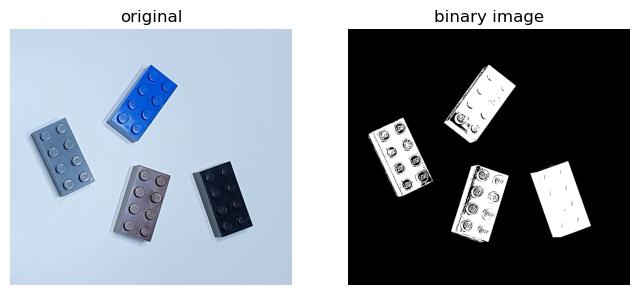

In [12]:
lego_5 = io.imread("lego_7.png")
lego_5_gray = color.rgb2gray(lego_5)
threshHold = threshold_otsu(lego_5_gray)
bin_img = lego_5_gray < threshHold

plot_comparison(lego_5,bin_img, "binary image")

We would like to find a way so only the outline of the entire brick is computed. So for each lego brick there should only be one closed curve.

Try using the closing operations and find out which size of footprint that gives the desired result?

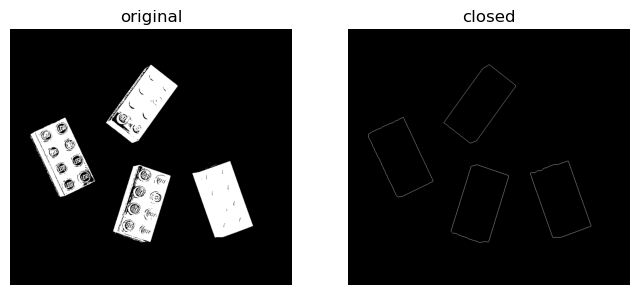

In [17]:
footprint = disk(9)

closed = closing(bin_img, footprint)
plot_comparison(bin_img,compute_outline(closed),"closed")

Try the above on the lego_3.png image. What do you observe?

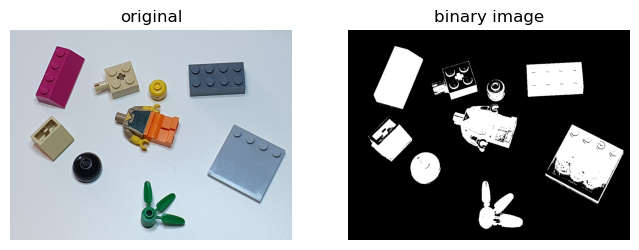

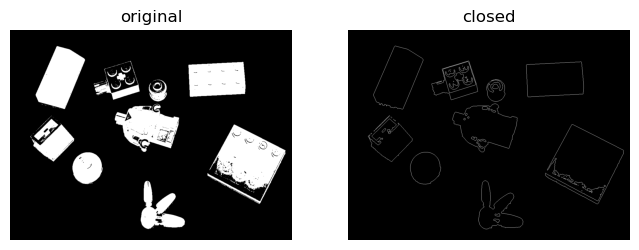

In [18]:
lego_5 = io.imread("lego_3.png")
lego_5_gray = color.rgb2gray(lego_5)
threshHold = threshold_otsu(lego_5_gray)
bin_img = lego_5_gray < threshHold

plot_comparison(lego_5,bin_img, "binary image")
footprint = disk(3)

closed = closing(bin_img, footprint)
plot_comparison(bin_img,compute_outline(closed),"closed")

reading the lego_9.png image and convert it to gray scale.
Compute a treshold using Otsu's method and apply it to the image.
Show the binary image together with the original.
Compute the outline of the binary image and show it with the binary image.

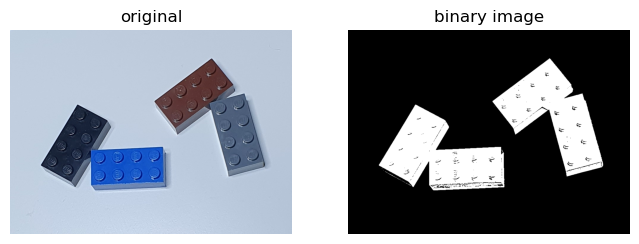

In [19]:
lego_5 = io.imread("lego_9.png")
lego_5_gray = color.rgb2gray(lego_5)
threshHold = threshold_otsu(lego_5_gray)
bin_img = lego_5_gray < threshHold

plot_comparison(lego_5,bin_img, "binary image")

Let us start by trying to remove the noise holes inside the lego bricks. Do that with an closing and find a good footprint size. Compute the outline and see what you observe?

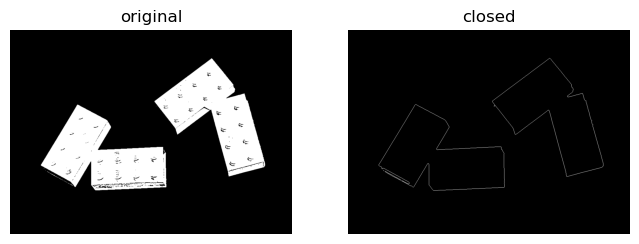

In [35]:
footprint = disk(3)

closed = closing(bin_img, footprint)
plot_comparison(bin_img,compute_outline(closed),"closed")

Now we will try to separate the objects. Try using a erosion on the image that you repaired in exercise 12. You should probably use a rather large footprint. How large does it need to be in order to split the objects?

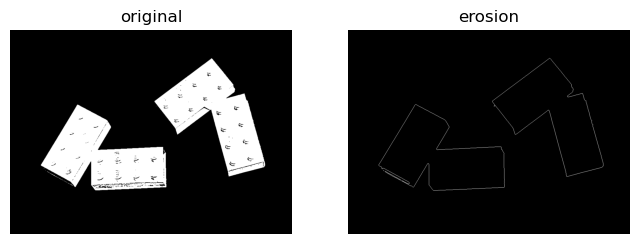

In [37]:
footprint = disk(2)

eroded = erosion(closed, footprint)
plot_comparison(bin_img,compute_outline(closed),"erosion")

The objects lost a lot of size in the previous step. Try to use dilate to make them larger. How large can you make them before they start touching?

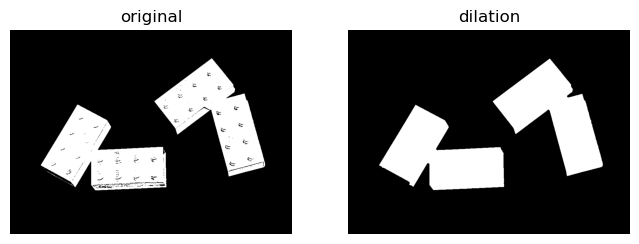

In [40]:
footprint = disk(1)

dilated = dilation(eroded, footprint)
plot_comparison(bin_img, dilated, 'dilation')

Use the previosly used methods to compute a binary image from the puzzle photo. What do you observe?

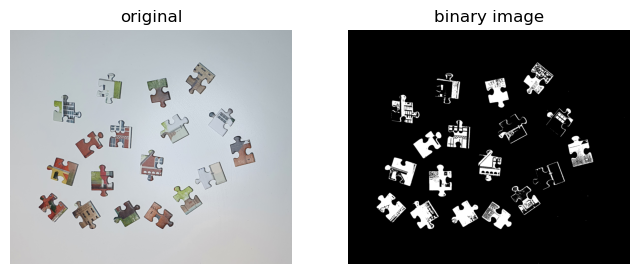

In [41]:
lego_5 = io.imread("puzzle_pieces.png")
lego_5_gray = color.rgb2gray(lego_5)
threshHold = threshold_otsu(lego_5_gray)
bin_img = lego_5_gray < threshHold

plot_comparison(lego_5,bin_img, "binary image")

Try to use a an opening with a large footprint to clean the binary. Compute the outline. Do we have good outlines for all the pieces?

The conclusion is that you can solve a lot of problems using morphological operations but sometimes it is better to think even more about how to acquire the images.

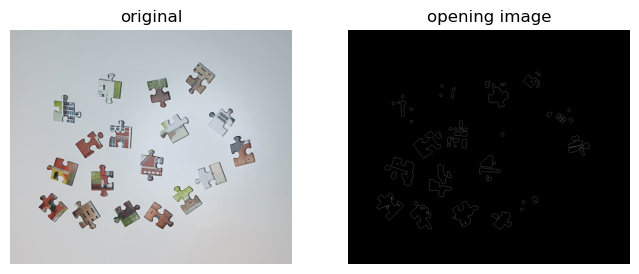

In [42]:
footprint = disk(8)
opening = opening(bin_img, footprint)


plot_comparison(lego_5,compute_outline(opening), "opening image")